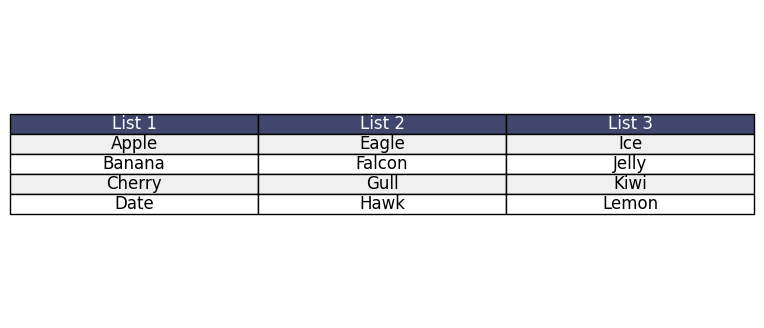

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

def create_table_plot(list1, list2, list3):
    # Ensure all lists are of the same length
    max_length = max(len(list1), len(list2), len(list3))
    list1 += [''] * (max_length - len(list1))
    list2 += [''] * (max_length - len(list2))
    list3 += [''] * (max_length - len(list3))

    # Create a DataFrame for the table
    data = {'List 1': list1, 'List 2': list2, 'List 3': list3}
    df = pd.DataFrame(data)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.axis('off')  # Hide the axes

    # Create the table with alternating row colors
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')

    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)

    # Apply alternating background colors
    for i, key in enumerate(table.get_celld().keys()):
        if key[0] == 0:  # Header row
            table.get_celld()[key].set_facecolor('#40466e')
            table.get_celld()[key].set_text_props(color='white')
        elif key[0] % 2 == 1:  # Odd rows
            table.get_celld()[key].set_facecolor('#f0f0f0')
        else:  # Even rows
            table.get_celld()[key].set_facecolor('#ffffff')

    # Display the plot
    plt.show()

# Example lists
list1 = ["Apple", "Banana", "Cherry", "Date"]
list2 = ["Eagle", "Falcon", "Gull", "Hawk"]
list3 = ["Ice", "Jelly", "Kiwi", "Lemon"]

# Create the table plot
create_table_plot(list1, list2, list3)

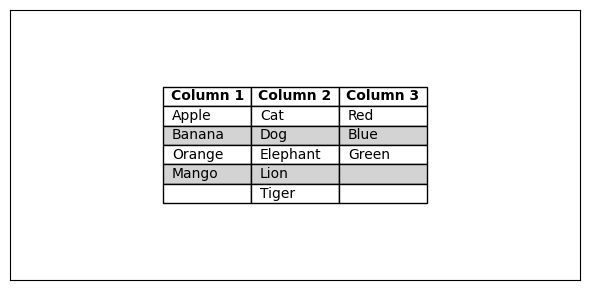

In [7]:
import matplotlib.pyplot as plt

def create_table_plot(col1, col2, col3):
    """
    Create a matplotlib table plot showing three columns side-by-side
    with alternating row colors.
    """
    
    # Ensure all columns have the same length by padding with empty strings
    max_len = max(len(col1), len(col2), len(col3))
    col1 += [""] * (max_len - len(col1))
    col2 += [""] * (max_len - len(col2))
    col3 += [""] * (max_len - len(col3))
    
    # Prepare the 2D data for the table: each row is [col1[i], col2[i], col3[i]]
    table_data = [[col1[i], col2[i], col3[i]] for i in range(max_len)]
    
    # Create the figure and axis
    # Adjust the figure size as you like
    fig, ax = plt.subplots(figsize=(6, 1 + 0.4 * max_len))

    # Hide default x/y axes
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    
    # Create the table
    # We include column headers as an example; if you don’t need headers, remove `colLabels`
    the_table = ax.table(
        cellText=table_data, 
        colLabels=["Column 1", "Column 2", "Column 3"], 
        loc='center',
        cellLoc='left'
    )
    
    # Adjust font size
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(10)
    
    # Auto-set column widths
    the_table.auto_set_column_width(col=list(range(3)))
    
    # Import color utilities
    import matplotlib.colors as mcolors
    white = mcolors.to_rgba('white')
    gray  = mcolors.to_rgba('lightgray')
    
    # -- Color the header row (row index=0) --
    header_row_idx = 0
    ncols = 3
    # Example: keep headers white, or color them in another way
    for col_idx in range(ncols):
        header_cell = the_table[header_row_idx, col_idx]
        header_cell.set_facecolor(white)
        header_cell.set_text_props(weight='bold')  # Make header text bold
    
    # -- Color the data rows (row indices 1..max_len) in alternating colors --
    for row_idx in range(1, max_len + 1):
        # Determine the row color
        # row_idx=1 means the first data row, row_idx=2 the second, etc.
        if (row_idx % 2) == 1:  # odd data row
            row_color = white
        else:                   # even data row
            row_color = gray
        
        for col_idx in range(ncols):
            cell = the_table[row_idx, col_idx]
            cell.set_facecolor(row_color)
    
    plt.tight_layout()
    return fig, ax


col1 = ["Apple", "Banana", "Orange", "Mango"]
col2 = ["Cat", "Dog", "Elephant", "Lion", "Tiger"]
col3 = ["Red", "Blue", "Green"]
    
fig, ax = create_table_plot(col1, col2, col3)
plt.show()

In [11]:
def create_table_plot_with_arrow(col1, col2, col3):
    """
    Create a matplotlib table with:
      - Column 1 (col1)
      - A completely blank column (for extra spacing)
      - Column 2 (col2), each entry prefixed with a right-pointing triangle arrow
      - Column 3 (col3)
      - Alternating row background colors.
    """
    
    # Ensure all columns have the same number of rows by padding with empty strings
    max_len = max(len(col1), len(col2), len(col3))
    col1 += [""] * (max_len - len(col1))
    col2 += [""] * (max_len - len(col2))
    col3 += [""] * (max_len - len(col3))
    
    # Define the arrow symbol (Unicode triangle pointing right).
    # Examples: "►", "▶", "▷", etc.
    arrow_symbol = "► "
    
    # Build 4-column table data:
    #   1) col1[i]
    #   2) "" (a blank column for spacing)
    #   3) arrow + col2[i]
    #   4) col3[i]
    table_data = []
    for i in range(max_len):
        c1 = col1[i]
        blank_col = ""
        c2 = arrow_symbol + col2[i] if col2[i] else ""  # prefix arrow if not empty
        c3 = col3[i]
        table_data.append([c1, blank_col, c2, c3])
    
    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(7, 1 + 0.4 * max_len))
    
    # Hide default x/y axes
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    
    # Create the table
    # Column labels: "Column 1", blank header, "Column 2", "Column 3"
    the_table = ax.table(
        cellText=table_data,
        colLabels=["Column 1", "", "Column 2", "Column 3"],  # blank label for the spacing column
        loc='center',
        cellLoc='left'
    )
    
    # Adjust table font size
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(10)
    
    # Auto-set column widths
    the_table.auto_set_column_width(col=[0, 1, 2, 3])
    
    # Colors for row striping
    import matplotlib.colors as mcolors
    white = mcolors.to_rgba('white')
    gray  = mcolors.to_rgba('lightgray')
    
    ncols = 4
    # The table has a header row at index=0
    # Data rows are 1..max_len
    for col_idx in range(ncols):
        header_cell = the_table[0, col_idx]
        header_cell.set_facecolor(white)
        header_cell.set_text_props(weight='bold')
    
    # Alternate row colors
    for row_idx in range(1, max_len + 1):
        row_color = gray if (row_idx % 2) == 0 else white
        for col_idx in range(ncols):
            the_table[row_idx, col_idx].set_facecolor(row_color)
    
    plt.tight_layout()
    return fig, ax

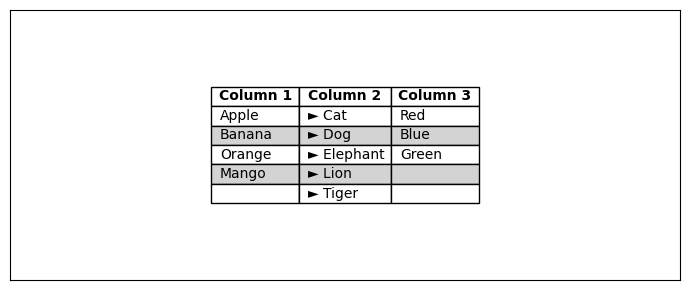

In [12]:
col1 = ["Apple", "Banana", "Orange", "Mango"]
col2 = ["Cat", "Dog", "Elephant", "Lion", "Tiger"]
col3 = ["Red", "Blue", "Green"]
    
fig, ax = create_table_plot_with_arrow(col1, col2, col3)
plt.show()

In [16]:

def create_two_tables_with_arrow(col1, col2, col3):
    """
    Creates a single matplotlib figure containing:
      - A left table with one column (col1).
      - A right table with two columns (col2, col3).
      - A large right-pointing arrow in the space between them.
      - Alternating row colors (striped).
    """
    # 1. Normalize lengths: ensure all have same row count by padding
    max_len = max(len(col1), len(col2), len(col3))
    col1 += [""] * (max_len - len(col1))
    col2 += [""] * (max_len - len(col2))
    col3 += [""] * (max_len - len(col3))
    
    # 2. Create a figure with 2 subplots side-by-side
    #    Adjust figsize if needed (width x height).
    fig = plt.figure(figsize=(10, 1 + 0.4 * max_len))
    
    # Subplot 1 (left)
    ax_left = fig.add_subplot(1, 2, 1)
    # Subplot 2 (right)
    ax_right = fig.add_subplot(1, 2, 2)
    
    # 3. Table data for each subplot
    # Left table: just 1 column
    left_data = [[col1[i]] for i in range(max_len)]
    # Right table: 2 columns side by side
    right_data = [[col2[i], col3[i]] for i in range(max_len)]
    
    # 4. Create the left table
    tbl_left = ax_left.table(
        cellText=left_data,
        colLabels=["Column 1"],  # header
        loc='center',
        cellLoc='left'
    )
    ax_left.axis('off')  # Hide axes
    
    # 5. Create the right table
    tbl_right = ax_right.table(
        cellText=right_data,
        colLabels=["Column 2", "Column 3"],  # headers
        loc='center',
        cellLoc='left'
    )
    ax_right.axis('off')  # Hide axes
    
    # 6. Adjust font sizes for both tables
    tbl_left.auto_set_font_size(False)
    tbl_left.set_fontsize(10)
    tbl_right.auto_set_font_size(False)
    tbl_right.set_fontsize(10)
    
    # Auto-set column widths
    tbl_left.auto_set_column_width([0])       # only 1 column in left table
    tbl_right.auto_set_column_width([0, 1])   # 2 columns in right table
    
    # 7. Striping (alternating row colors)
    import matplotlib.colors as mcolors
    white = mcolors.to_rgba('white')
    gray  = mcolors.to_rgba('lightgray')
    
    # Left table striping
    # Header row is row 0; data rows are 1..max_len
    ncols_left = 1
    # Header row
    for c in range(ncols_left):
        tbl_left[0, c].set_facecolor(white)
        tbl_left[0, c].set_text_props(weight='bold')
    # Data rows
    for row_idx in range(1, max_len+1):
        row_color = gray if (row_idx % 2) == 0 else white
        for c in range(ncols_left):
            tbl_left[row_idx, c].set_facecolor(row_color)
    
    # Right table striping
    ncols_right = 2
    # Header row
    for c in range(ncols_right):
        tbl_right[0, c].set_facecolor(white)
        tbl_right[0, c].set_text_props(weight='bold')
    # Data rows
    for row_idx in range(1, max_len+1):
        row_color = gray if (row_idx % 2) == 0 else white
        for c in range(ncols_right):
            tbl_right[row_idx, c].set_facecolor(row_color)
    
    # 8. Adjust spacing between subplots so there's a noticeable blank region
    #    We'll then place an arrow in that space.
    plt.subplots_adjust(wspace=1.5)  # Increase if you need more space
    
    # 9. Add a large arrow in the middle space
    #    We'll place a big arrow symbol at the figure center (horizontal=0.5).
    #    Adjust the vertical coordinate as needed (0.5 is middle).
    #    Also adjust the fontsize for arrow size.
    
    # Unicode arrow examples: "⇒", "➡", "▶", "►"
    arrow_symbol = "⇒"
    fig.text(0.5, 0.5, arrow_symbol,
             ha='center', va='center', fontsize=40)  # you can experiment with coords or fontsize
    
    # 10. Tight layout so nothing is clipped, though we have a big wspace
    plt.tight_layout()
    return fig

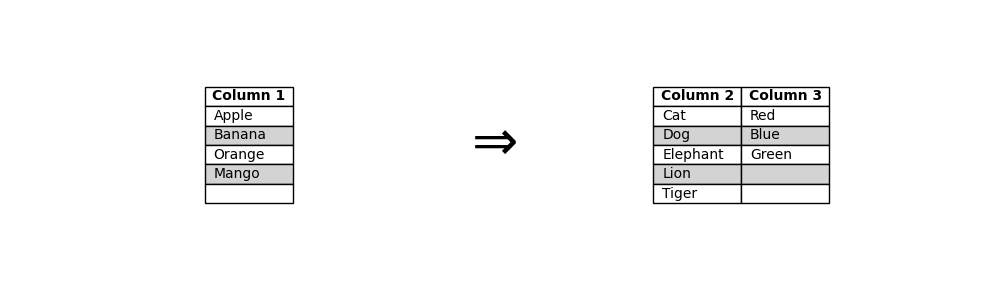

In [19]:
col1 = ["Apple", "Banana", "Orange", "Mango"]
col2 = ["Cat", "Dog", "Elephant", "Lion", "Tiger"]
col3 = ["Red", "Blue", "Green"]
    
fig = create_two_tables_with_arrow(col1, col2, col3)
plt.show()

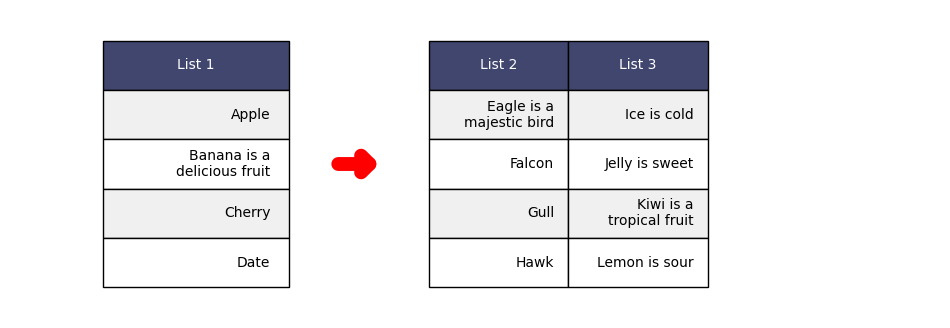

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import textwrap

def wrap_text(text, width=15):
    """Wrap text to a specified width."""
    return '\n'.join(textwrap.wrap(text, width))

def create_table_plot(list1, list2, list3):
    # Ensure all lists are of the same length
    max_length = max(len(list1), len(list2), len(list3))
    list1 += [''] * (max_length - len(list1))
    list2 += [''] * (max_length - len(list2))
    list3 += [''] * (max_length - len(list3))

    # Wrap text in each list
    list1 = [wrap_text(item) for item in list1]
    list2 = [wrap_text(item) for item in list2]
    list3 = [wrap_text(item) for item in list3]

    # Create DataFrames for the two tables
    df1 = pd.DataFrame({'List 1': list1})
    df2 = pd.DataFrame({'List 2': list2, 'List 3': list3})

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.axis('off')  # Hide the axes

    # Create the first table (List 1)
    table1 = ax.table(cellText=df1.values, colLabels=df1.columns, loc='center left', bbox=[0.1, 0.1, 0.2, 0.8])

    # Create the second table (List 2 and List 3)
    table2 = ax.table(cellText=df2.values, colLabels=df2.columns, loc='center right', bbox=[0.45, 0.1, 0.3, 0.8])

    # Style the tables
    for table in [table1, table2]:
        table.auto_set_font_size(False)
        table.set_fontsize(10)  # Reduce font size to accommodate wrapped text
        table.scale(1.2, 1.2)

    # Apply alternating background colors to both tables
    for i, key in enumerate(table1.get_celld().keys()):
        if key[0] == 0:  # Header row
            table1.get_celld()[key].set_facecolor('#40466e')
            table1.get_celld()[key].set_text_props(color='white')
        elif key[0] % 2 == 1:  # Odd rows
            table1.get_celld()[key].set_facecolor('#f0f0f0')
        else:  # Even rows
            table1.get_celld()[key].set_facecolor('#ffffff')

    for i, key in enumerate(table2.get_celld().keys()):
        if key[0] == 0:  # Header row
            table2.get_celld()[key].set_facecolor('#40466e')
            table2.get_celld()[key].set_text_props(color='white')
        elif key[0] % 2 == 1:  # Odd rows
            table2.get_celld()[key].set_facecolor('#f0f0f0')
        else:  # Even rows
            table2.get_celld()[key].set_facecolor('#ffffff')

    # Add a shorter and larger triangle-shaped arrow between the two tables
    arrow_start = (0.35, 0.5)  # Start of the arrow (x, y)
    arrow_end = (0.4, 0.5)    # End of the arrow (x, y)
    ax.annotate('', xy=arrow_end, xytext=arrow_start,
                arrowprops=dict(arrowstyle='->,head_width=0.6,head_length=0.6', lw=10, color='red'))

    # Display the plot
    plt.show()

# Example lists with long text
list1 = ["Apple", "Banana is a delicious fruit", "Cherry", "Date"]
list2 = ["Eagle is a majestic bird", "Falcon", "Gull", "Hawk"]
list3 = ["Ice is cold", "Jelly is sweet", "Kiwi is a tropical fruit", "Lemon is sour"]

# Create the table plot
create_table_plot(list1, list2, list3)

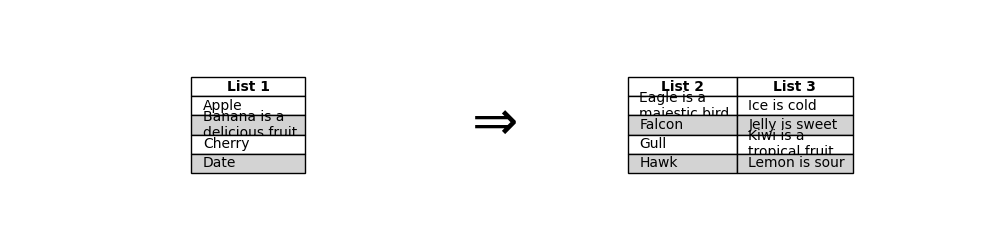

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import textwrap
import matplotlib.colors as mcolors

def wrap_text(text, width=15):
    """Wrap text to a specified width."""
    return '\n'.join(textwrap.wrap(text, width))

def create_table_plot(list1, list2, list3):
    # Ensure all lists are of the same length
    max_length = max(len(list1), len(list2), len(list3))
    list1 += [''] * (max_length - len(list1))
    list2 += [''] * (max_length - len(list2))
    list3 += [''] * (max_length - len(list3))

    # Wrap text in each list
    list1 = [wrap_text(item) for item in list1]
    list2 = [wrap_text(item) for item in list2]
    list3 = [wrap_text(item) for item in list3]

    # Create a figure with two subplots
    fig = plt.figure(figsize=(10, 1 + 0.4 * max_length))

    # Subplot 1 (left table)
    ax_left = fig.add_subplot(1, 2, 1)
    # Subplot 2 (right table)
    ax_right = fig.add_subplot(1, 2, 2)

    # Left table data
    left_data = [[list1[i]] for i in range(max_length)]
    # Right table data
    right_data = [[list2[i], list3[i]] for i in range(max_length)]

    # Create the left table
    tbl_left = ax_left.table(
        cellText=left_data,
        colLabels=["List 1"],  # header
        loc='center',
        cellLoc='left'
    )
    ax_left.axis('off')  # Hide axes

    # Create the right table
    tbl_right = ax_right.table(
        cellText=right_data,
        colLabels=["List 2", "List 3"],  # headers
        loc='center',
        cellLoc='left'
    )
    ax_right.axis('off')  # Hide axes

    # Adjust font sizes for both tables
    tbl_left.auto_set_font_size(False)
    tbl_left.set_fontsize(10)
    tbl_right.auto_set_font_size(False)
    tbl_right.set_fontsize(10)

    # Auto-set column widths
    tbl_left.auto_set_column_width([0])       # only 1 column in left table
    tbl_right.auto_set_column_width([0, 1])   # 2 columns in right table

    # Striping (alternating row colors)
    white = mcolors.to_rgba('white')
    gray = mcolors.to_rgba('lightgray')

    # Left table striping
    ncols_left = 1
    # Header row
    for c in range(ncols_left):
        tbl_left[0, c].set_facecolor(white)
        tbl_left[0, c].set_text_props(weight='bold')
    # Data rows
    for row_idx in range(1, max_length + 1):
        row_color = gray if (row_idx % 2) == 0 else white
        for c in range(ncols_left):
            tbl_left[row_idx, c].set_facecolor(row_color)

    # Right table striping
    ncols_right = 2
    # Header row
    for c in range(ncols_right):
        tbl_right[0, c].set_facecolor(white)
        tbl_right[0, c].set_text_props(weight='bold')
    # Data rows
    for row_idx in range(1, max_length + 1):
        row_color = gray if (row_idx % 2) == 0 else white
        for c in range(ncols_right):
            tbl_right[row_idx, c].set_facecolor(row_color)

    # Adjust spacing between subplots so there's a noticeable blank region
    plt.subplots_adjust(wspace=1.5)  # Increase if you need more space

    # Add a large arrow in the middle space
    arrow_symbol = "⇒"
    fig.text(0.5, 0.5, arrow_symbol,
             ha='center', va='center', fontsize=40)  # Adjust fontsize for arrow size

    # Tight layout so nothing is clipped
    plt.tight_layout()

    # Display the plot
    plt.show()

# Example lists with long text
list1 = ["Apple", "Banana is a delicious fruit", "Cherry", "Date"]
list2 = ["Eagle is a majestic bird", "Falcon", "Gull", "Hawk"]
list3 = ["Ice is cold", "Jelly is sweet", "Kiwi is a tropical fruit", "Lemon is sour"]

# Create the table plot
create_table_plot(list1, list2, list3)